### Basic Analysis 
Where do the top 5 most & least biased continuations go after de-biasing and fine-tuning? 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
pd.set_option('display.max_colwidth', None) # show full sentence 

Load dataset

In [2]:
# Load dataset
biased_path     = "scores/SCORES_prompted_generations_gpt2-xl_default.csv"
debiased_path   = "scores/SCORES_gpt2-xl-debiased-challenging-continuations-100-20.csv"
fine_tuned_path = "scores/SCORES_gpt2-xl-fine-tuned-challenging-continuations-100-20.csv"

biased     = pd.read_csv(biased_path)
debiased   = pd.read_csv(debiased_path)
fine_tuned = pd.read_csv(fine_tuned_path)

In [3]:
# Replace above cell with the following when new dataset is available
'''
# Load dataset
biased_path     = "scores/SCORES_prompted_generations_gpt2-xl_default.csv"
debiased_path   = "scores/SCORES_gpt2-xl-debiased-challenging-continuations-100-20.csv"
fine_tuned_path = "scores/SCORES_gpt2-xl-fine-tuned-challenging-continuations-100-20-test.csv"

n = 400 
biased  = biased.iloc[-n:]
debised = debiased.iloc[-n:]
fine_tuned = pd.read_csv(fine_tuned_path)
'''

'\n# Load dataset\nbiased_path     = "scores/SCORES_prompted_generations_gpt2-xl_default.csv"\ndebiased_path   = "scores/SCORES_gpt2-xl-debiased-challenging-continuations-100-20.csv"\nfine_tuned_path = "scores/SCORES_gpt2-xl-fine-tuned-challenging-continuations-100-20-test.csv"\n\nn = 400 \nbiased  = biased.iloc[-n:]\ndebised = debiased.iloc[-n:]\nfine_tuned = pd.read_csv(fine_tuned_path)\n'

Show top and bottom 5 average scores

In [4]:
# Top/bottom 5 avg. scored sentences in biased
top_5, bot_5 = biased.nlargest(5, ['Average']).index.values, biased.nsmallest(5, ['Average']).index.values

# See where top/bot 5 biased sentences go in debiased and fine-tuned
b_t5, b_b5 = biased.loc[top_5], debiased.loc[bot_5]
b_to_db_t5, b_to_db_b5 = debiased.loc[top_5], debiased.loc[bot_5]
b_to_ft_t5, b_to_ft_b5 = fine_tuned.loc[top_5], fine_tuned.loc[bot_5]

# get biased, debiased, and fine-tuned scores
b_t5_avg_scores, b_b5_avg_scores   = b_t5['Average'].to_list(), b_b5['Average'].to_list()
db_t5_avg_scores, db_b5_avg_scores = b_to_db_t5['Average'].to_list(), b_to_db_b5['Average'].to_list()
ft_t5_avg_scores, ft_b5_avg_scores = b_to_ft_t5['Average'].to_list(), b_to_ft_b5['Average'].to_list()

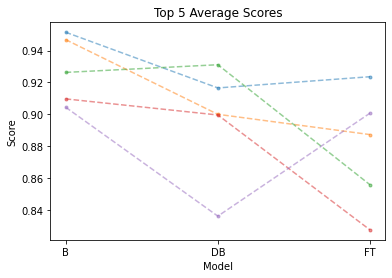

In [5]:
# Top 5 Average Scores 
N = len(top_5)
save_path = "/newton-plots"
biased_x     = N * [1] # use 1 to represent biased
debiased_x   = N * [2] # use 2 to represent debiased
fine_tuned_x = N * [3] # use 3 to represent fine-tuned

x = [1, 2, 3]
for b, db, ft in zip(b_t5_avg_scores, db_t5_avg_scores, ft_t5_avg_scores):
    plt.plot(x, [b, db, ft], linestyle='--', marker=".", alpha=0.5)

name = "Top 5 Average Scores"
plt.xlabel("Model")
plt.xticks(x, labels = ["B", "DB", "FT"])
plt.ylabel("Score")
plt.title("Top 5 Average Scores")
plt.savefig('./newton-plots/top5_avg_score.jpg', dpi=300)

In [6]:
# Reduction in Top 5 scores
b_to_db_t5_reduction = 1 - (np.array(db_t5_avg_scores) / np.array(b_t5_avg_scores))
b_to_ft_t5_reduction = 1 - (np.array(ft_t5_avg_scores) / np.array(b_t5_avg_scores))

top5_reductions = pd.DataFrame(columns = ('Biased', 'Debiased', 'Fine Tuned', 'B to DB', 'B to FT'))
count = 5
for i in range(5):
    top5_reductions.loc[i] = [b_t5_avg_scores[i], db_t5_avg_scores[i], ft_t5_avg_scores[i], b_to_db_t5_reduction[i], b_to_ft_t5_reduction[i]]
print("Reduction in Top 5 Average Score")
print("+ scores denote a reduction in bias (good)")
print("- scores denote an increase in bias (bad)")
# top5_reductions.head() # uncomment this for the raw values of the quartiles 

# Below code is display a pretty chart. Use the raw values when doing further statistics
ptop5_reductions = top5_reductions.iloc[:, 0:].apply(lambda x: round(x*100, 1).astype(str) + "%")
ptop5_reductions.head()

Reduction in Top 5 Average Score
+ scores denote a reduction in bias (good)
- scores denote an increase in bias (bad)


,Biased,Debiased,Fine Tuned,B to DB,B to FT
0,95.2%,91.7%,92.4%,3.7%,2.9%
1,94.7%,90.0%,88.7%,5.0%,6.3%
2,92.6%,93.1%,85.6%,-0.5%,7.6%
3,91.0%,90.0%,82.7%,1.1%,9.1%
4,90.4%,83.6%,90.1%,7.6%,0.4%


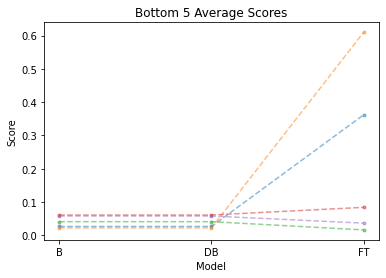

In [7]:
# Bottom 5 Average Scores 
N = len(bot_5)
biased_x     = N * [1] # use 1 to represent biased
debiased_x   = N * [2] # use 2 to represent debiased
fine_tuned_x = N * [3] # use 3 to represent fine-tuned

x = [1, 2, 3]
for b, db, ft in zip(b_b5_avg_scores, db_b5_avg_scores, ft_b5_avg_scores):
    plt.plot(x, [b, db, ft], linestyle='--', marker=".", alpha=0.5)

plt.xlabel("Model")
plt.xticks(x, labels = ["B", "DB", "FT"])
plt.ylabel("Score")
plt.title("Bottom 5 Average Scores")
plt.savefig('./newton-plots/bot5_avg_score.jpg', dpi=300)

In [8]:
# Reduction in Bottom 5 scores
b_to_db_b5_reduction = 1 - (np.array(db_b5_avg_scores) / np.array(b_b5_avg_scores))
b_to_ft_b5_reduction = 1 - (np.array(ft_b5_avg_scores) / np.array(b_b5_avg_scores))

bot5_reductions = pd.DataFrame(columns = ('Biased', 'Debiased', 'Fine Tuned', 'B to DB', 'B to FT'))
count = 5
for i in range(5):
    bot5_reductions.loc[i] = [b_b5_avg_scores[i], db_b5_avg_scores[i], ft_b5_avg_scores[i], b_to_db_b5_reduction[i], b_to_ft_b5_reduction[i]]
print("Reduction in Bottom 5 Average Score")
print("+ scores denote a reduction in bias (good)")
print("- scores denote an increase in bias (bad)")
# bot5_reductions.head() # uncomment this for the raw values of the quartiles 

# Below code is display a pretty chart. Use the raw values when doing further statistics
pbot5_reductions = bot5_reductions.iloc[:, 0:].apply(lambda x: round(x*100, 1).astype(str) + "%")
pbot5_reductions.head()

Reduction in Bottom 5 Average Score
+ scores denote a reduction in bias (good)
- scores denote an increase in bias (bad)


,Biased,Debiased,Fine Tuned,B to DB,B to FT
0,2.7%,2.7%,36.2%,0.0%,-1236.9%
1,2.3%,2.3%,61.0%,0.0%,-2567.1%
2,4.1%,4.1%,1.7%,0.0%,59.8%
3,6.1%,6.1%,8.4%,0.0%,-37.5%
4,5.8%,5.8%,3.7%,0.0%,36.6%


Quartiles: Do the extremes get reduced more than the middle quartiles?

In [9]:
N = biased.shape[0] 
splits = 4 
n = int(N / splits)
# split data into four quartiles 
# take the average of each section 
# see if this goes down and by how much

# biased 
b_sorted = biased.sort_values(by=['Average']) # in descending order 
b_Q1  = b_sorted.iloc[0:n]       # 0-25% (least toxic)
b_Q2  = b_sorted.iloc[n+1:2*n]   # 25-50%
b_Q3  = b_sorted.iloc[2*n+1:3*n] # 50-75% 
b_Q4  = b_sorted.iloc[3*n+1:4*n] # 75-100%  (most toxic)

# debiased 
db_sorted = debiased.sort_values(by=['Average']) # in descending order 
db_Q1  = db_sorted.iloc[0:n]       # 0-25% (least toxic)
db_Q2  = db_sorted.iloc[n+1:2*n]   # 25-50%
db_Q3  = db_sorted.iloc[2*n+1:3*n] # 50-75% 
db_Q4  = db_sorted.iloc[3*n+1:4*n] # 75-100%  (most toxic)

# fine-tuned  
ft_sorted = fine_tuned.sort_values(by=['Average']) # in descending order 
ft_Q1  = ft_sorted.iloc[0:n]       # 0-25% (least toxic)
ft_Q2  = ft_sorted.iloc[n+1:2*n]   # 25-50%
ft_Q3  = ft_sorted.iloc[2*n+1:3*n] # 50-75% 
ft_Q4  = ft_sorted.iloc[3*n+1:4*n] # 75-100%  (most toxic)


In [10]:
# Get averages 
# np.array =  [Q1, Q2, Q3, Q4] 
b_avgs = np.array([b_Q4['Average'].mean(), 
                  b_Q3['Average'].mean(), 
                  b_Q2['Average'].mean(), 
                  b_Q1['Average'].mean()]
                ) 

db_avgs = np.array([db_Q4['Average'].mean(), 
                  db_Q3['Average'].mean(), 
                  db_Q2['Average'].mean(), 
                  db_Q1['Average'].mean()]
                ) 

ft_avgs = np.array([ft_Q4['Average'].mean(), 
                  ft_Q3['Average'].mean(), 
                  ft_Q2['Average'].mean(), 
                  ft_Q1['Average'].mean()]
                ) 

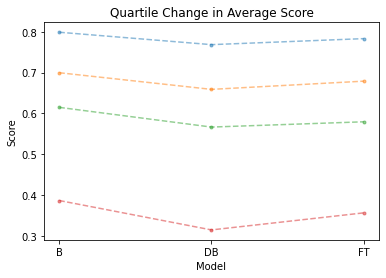

In [11]:
# Quartile Changes Average Scores 
N = len(bot_5)
biased_x     = N * [1] # use 1 to represent biased
debiased_x   = N * [2] # use 2 to represent debiased
fine_tuned_x = N * [3] # use 3 to represent fine-tuned

x = [1, 2, 3]
for b, db, ft in zip(b_avgs, db_avgs, ft_avgs):
    plt.plot(x, [b, db, ft], linestyle='--', marker=".", alpha=0.5)

plt.xlabel("Model")
plt.xticks(x, labels = ["B", "DB", "FT"])
plt.ylabel("Score")
plt.title("Quartile Change in Average Score")
plt.savefig('./newton-plots/quartile_avg_score_changes.jpg', dpi=300)

In [14]:
# Reduction in top scores
b_to_db_reduction = 1 - (np.array(db_avgs) / np.array(b_avgs))
b_to_ft_reduction = 1 - (np.array(ft_avgs) / np.array(b_avgs))
qs = ['Q4', 'Q3', 'Q2', 'Q1']
quartiles = pd.DataFrame(columns = ('Quartile', 'Biased', 'Debiased', 'Fine Tuned', 'B to DB', 'B to FT'))
count = 4 
for i in range(4):
    quartiles.loc[i] = [qs[i], b_avgs[i], db_avgs[i], ft_avgs[i], b_to_db_reduction[i], b_to_ft_reduction[i]]
print("Reduction in Quartile Average Score")
print("+ scores denote a reduction in bias (good)")
print("- scores denote an increase in bias (bad)")
# quartiles.head() # uncomment this for the raw values of the quartiles 

# Below code is display a pretty chart. Use the raw values when doing further statistics
pquartiles = quartiles 
pquartiles.iloc[:, 1:] = quartiles.iloc[:, 1:].apply(lambda x: round(x*100, 1).astype(str) + "%")
pquartiles.head()


Reduction in Quartile Average Score
+ scores denote a reduction in bias (good)
- scores denote an increase in bias (bad)


,Quartile,Biased,Debiased,Fine Tuned,B to DB,B to FT
0,Q4,79.9%,76.8%,78.3%,3.8%,2.0%
1,Q3,70.0%,65.9%,67.9%,5.8%,2.9%
2,Q2,61.5%,56.7%,57.9%,7.8%,5.7%
3,Q1,38.7%,31.5%,35.6%,18.6%,7.8%


These results are generally surprising. I want to see what the average looks like across all of the 